In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [18]:
athlete = pd.read_csv("/content/athlete_events.csv")


In [16]:
noc = pd.read_csv("/content/noc_regions.csv")

In [19]:
ath = athlete.copy()
nat = noc.copy()

In [20]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [21]:
ath.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [22]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [23]:
noc.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [24]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [25]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [26]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [27]:
ath.shape

(271116, 15)

In [28]:
ath.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# New section

**. Data Cleaning & Data Manipulation**

In [29]:
at=ath.merge(nat,how="left",on="NOC")
#at.drop(['NOC','notes'],axis=1,inplace=True)

In [30]:
at.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [31]:
region_col = ath['NOC'].map(nat.set_index('NOC')['region'])
ath.insert(7,'region', region_col)

In [32]:
ath

,ID,Name,Sex,Age,Height,Weight,Team,region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,Poland,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


. Drop the columns  "NOC" from the DataFrame" ath

In [33]:
ath.drop('NOC', inplace = True, axis=1)

In [34]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# New section

. Handling the Null values in the
columns - "Age", "Height" & "Weight"
byt the mean of the respective columns

In [35]:
ath.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
region       370
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [36]:
ath['Age'].fillna(ath.Age.mean(), inplace=True)
ath['Height'].fillna(ath.Height.mean(), inplace=True)
ath['Weight'].fillna(ath.Weight.mean(), inplace=True)

In [37]:
ath[ath.Age.isnull()].head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal


In [38]:
ath.iloc[147]

ID                              54
Name         Mohamed Jamshid Abadi
Sex                              M
Age                      25.556898
Height                   175.33897
Weight                   70.702393
Team                          Iran
region                        Iran
Games                  1948 Summer
Year                          1948
Season                      Summer
City                        London
Sport                       Boxing
Event     Boxing Men's Heavyweight
Medal                          NaN
Name: 147, dtype: object

In [39]:
ath.iloc[[147]]

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,25.556898,175.33897,70.702393,Iran,Iran,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN


In [40]:
ath.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
region       370
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# New section

List out all the values of the
region columns where thr values are null

In [41]:
ath[ath.region.isna()].head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,175.33897,70.702393,Singapore,NaN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25.0,175.33897,70.702393,Singapore,NaN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.00000,68.000000,Singapore,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.00000,61.000000,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21.0,180.00000,75.000000,Singapore,NaN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [42]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [43]:
nat.where(nat['region']=='Singapur')

,NOC,region,notes
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
225,NaN,NaN,NaN
226,NaN,NaN,NaN
227,NaN,NaN,NaN
228,NaN,NaN,NaN


In [107]:
nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


# New section

. Handling the null values in the column 'Medals'

In [44]:
ath['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [45]:
ath['Medal'].nunique()   # All total numbers


3

In [46]:
ath['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [47]:
ath.Medal = ath.Medal.replace({"NaN":0,"Gold":1,"Silver":2, "Bronze":3})

In [48]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1.0
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [49]:
ath['Medal'].value_counts()

1.0    13372
3.0    13295
2.0    13116
Name: Medal, dtype: int64

In [50]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  270746 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 31.0+ MB


In [51]:
ath.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
region       370
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# New section

.Dropping off the unwanterd column

In [52]:
ath.drop(['region','Games'],axis=1,inplace=True)

In [53]:
ath.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


# New section

. Remove the unwanted phrases from the "Event" column

In [ ]:
ath.Event.head(10)

In [55]:
ath.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1.0
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
re.sub('','',ath.Event)

In [60]:
for i,j in zip(ath.Sport,range(len(ath.Event))):
    ath.Event[j] = re.sub(f"{i}+' '","",ath.Event[j])

<ipython-input-60-7bdaf60194ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f"{i}+' '","",ath.Event[j])


In [61]:
ath.Event[4]

"Speed Skating Women's 500 metres"

In [66]:
re.sub("Basketball\s","",ath.Event[0])

"Men's Basketball"

In [67]:
ath.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1.0


In [68]:
ath.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1.0
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [69]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 26.9+ MB


# New section

. Changing datatype of the  "Age"

In [72]:
ath.Age = ath.Age.astype(int)   # changing datatype

In [73]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 26.9+ MB


# New section

. Exportation of the DataFrame

In [75]:
# Export the JSON
ath.to_json("athletes_dataset.jason")
# Export the Excel
ath.to_excel("athletes_dataset.xlsx")
# Export to .Csv
ath.to_csv("athletes_dataset.csv")

# New section

. Data **Analysis**
. show the all relationship between height and weight

Text(0.5, 0, 'Weight')

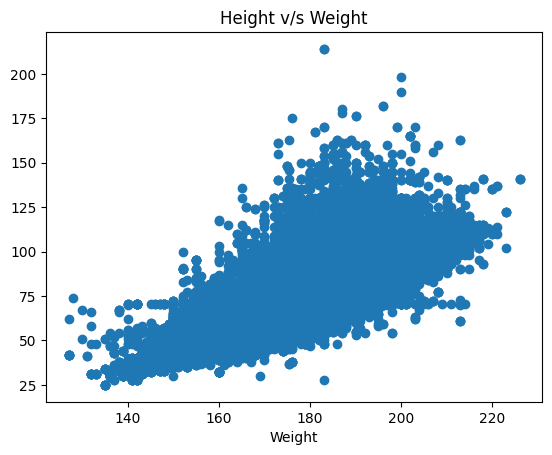

In [79]:
x = ath.Height
y = ath.Weight
plt.scatter(x,y)
plt.title("Height v/s Weight")
plt.xlabel("Height")
plt.xlabel("Weight")

conclusion

# New section

. Find out now many male and female  had participeted in the Olympics during 1896 to 2016

In [80]:
ath.describe()

,ID,Age,Height,Weight,Year,Medal
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000,39783.000000
mean,68248.954396,25.537438,175.33897,70.702393,1978.378480,1.998064
std,39022.286345,6.281690,9.27810,12.574690,29.877632,0.818733
min,1.000000,10.000000,127.00000,25.000000,1896.000000,1.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000,1.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000,2.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000,3.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000,3.000000


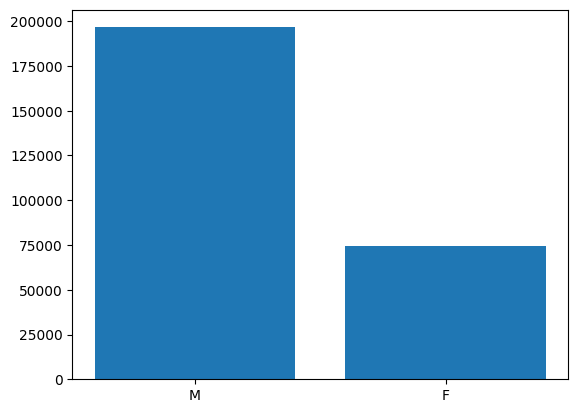

In [83]:
import matplotlib.pyplot as plt

x = ath.Sex.value_counts()
plt.bar(x.index, x.values)
plt.show()


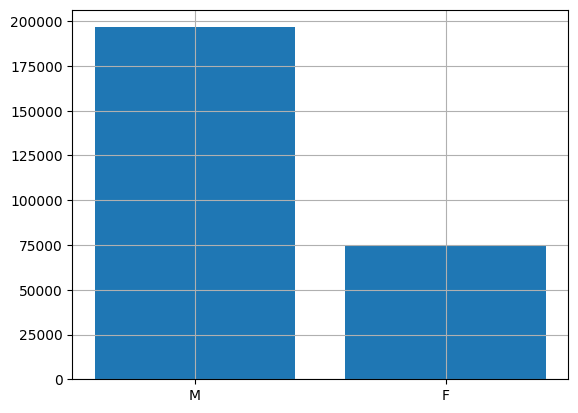

In [85]:
import matplotlib.pyplot as plt

x = ath.Sex.value_counts()
plt.bar(x.index, x.values)
plt.grid()


# New section

. How many Male have participated in the summer and winter

<Axes: >

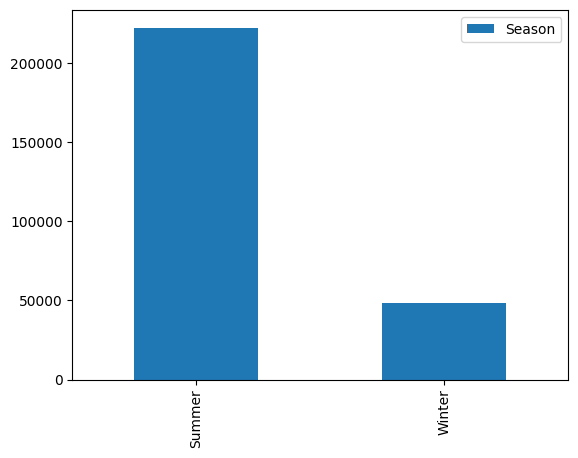

In [86]:
plimport pandas as pd

x = ath.Season.value_counts().to_frame()
x.plot.bar(y='Season')


In [91]:
import plotly.express as px

(array([196594.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  74522.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

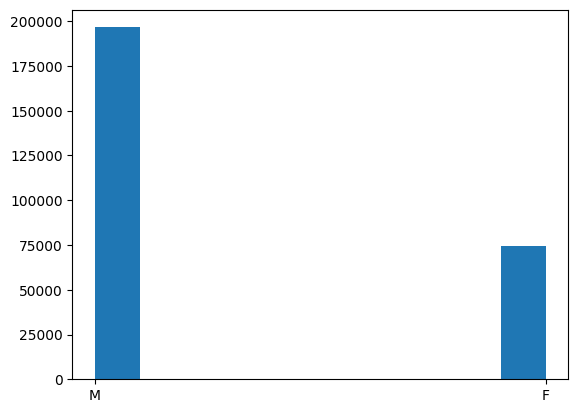

In [87]:
plt.hist(ath.Sex)

In [95]:
fig = px.histogram(ath, x=ath.Season, color=ath.Sex)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# New section

. Name  the Top 5 countries who have the most medals

In [96]:
ath.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [99]:
fig = px.histogram(ath.Medal, x = ath.Team)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [104]:
fig = px.histogram(ath[ath.Sex == "F"]["Sex"],x=ath.Year)
fig.show()

In [100]:
ath.Sex

0         M
1         M
2         M
3         M
4         F
         ..
271111    M
271112    M
271113    M
271114    M
271115    M
Name: Sex, Length: 271116, dtype: object

In [101]:
ath[ath.Sex == "F"]

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27,185.0,82.0,Netherlands,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33,168.0,80.0,Soviet Union,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,3.0
271099,135560,Stavroula Zygouri,F,36,171.0,63.0,Greece,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN
271102,135563,Olesya Nikolayevna Zykina,F,19,171.0,64.0,Russia,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,3.0
271103,135563,Olesya Nikolayevna Zykina,F,23,171.0,64.0,Russia,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,2.0


In [102]:
ath[ath.Sex == "F"]["Sex"]

4         F
5         F
6         F
7         F
8         F
         ..
271080    F
271099    F
271102    F
271103    F
271110    F
Name: Sex, Length: 74522, dtype: object

In [105]:
ath[ath.Sex == "F"]

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27,185.0,82.0,Netherlands,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33,168.0,80.0,Soviet Union,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,3.0
271099,135560,Stavroula Zygouri,F,36,171.0,63.0,Greece,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN
271102,135563,Olesya Nikolayevna Zykina,F,19,171.0,64.0,Russia,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,3.0
271103,135563,Olesya Nikolayevna Zykina,F,23,171.0,64.0,Russia,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,2.0
